<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week1/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


* Pustaka-pustaka ini diperlukan untuk membaca dataset, membagi data, membangun model regresi, melakukan evaluasi, dan visualisasi.

In [7]:
dataset = pd.read_csv('/content/sample_data/Position_Salaries.csv')


* Dataset Position Salaries.csv dibaca menggunakan pandas dan disimpan dalam variabel dataset.

In [8]:
print(dataset.head())


            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


* Baris pertama dataset ditampilkan untuk melihat struktur data.

In [9]:
X = dataset[['Level']].values  # Menggunakan kolom 'Level' sebagai fitur independen
y = dataset['Salary'].values   # Target adalah 'Salary'


* Fitur independen adalah Level, sedangkan target yang ingin diprediksi adalah Salary.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* Dataset dibagi menjadi 80% data pelatihan dan 20% data pengujian.

In [11]:
simple_lin_reg = LinearRegression()
simple_lin_reg.fit(X_train, y_train)


LinearRegression()

* Model Simple Linear Regression dilatih menggunakan fitur Level.

In [12]:
y_pred_simple = simple_lin_reg.predict(X_test)


* Model digunakan untuk memprediksi Salary berdasarkan Level di data pengujian.

In [13]:
print("Simple Linear Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_simple))
print("R^2 Score:", r2_score(y_test, y_pred_simple))


Simple Linear Regression:
Mean Squared Error (MSE): 7840057409.334131
R^2 Score: 0.8451346684575974


* MSE mengukur rata-rata kesalahan kuadrat dari prediksi, sementara R² Score mengukur seberapa baik model memprediksi data.

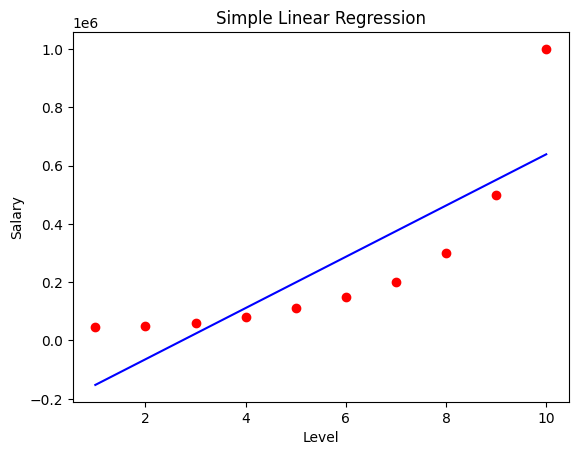

In [14]:
plt.scatter(X, y, color='red')
plt.plot(X, simple_lin_reg.predict(X), color='blue')
plt.title('Simple Linear Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()


* Hasil regresi linier divisualisasikan dengan scatter plot (titik merah) dan garis prediksi (garis biru).

In [15]:
dataset['Level_squared'] = dataset['Level'] ** 2
X_multiple = dataset[['Level', 'Level_squared']].values


* Multiple Linear Regression memerlukan lebih dari satu fitur independen. Namun, jika dataset Position Salaries.csv hanya memiliki satu fitur Level, maka fitur tambahan bisa ditambahkan. Misalnya, menambahkan kolom buatan:

In [16]:
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size=0.2, random_state=42)


* Data dibagi menjadi set pelatihan dan pengujian seperti pada Simple Linear Regression.

In [17]:
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(X_train_multiple, y_train_multiple)


LinearRegression()

* Model Multiple Linear Regression dilatih menggunakan fitur Level dan fitur tambahan seperti Level_squared.

In [18]:
y_pred_multiple = multiple_lin_reg.predict(X_test_multiple)


* Model digunakan untuk memprediksi Salary pada data pengujian.

In [19]:
print("\nMultiple Linear Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test_multiple, y_pred_multiple))
print("R^2 Score:", r2_score(y_test_multiple, y_pred_multiple))



Multiple Linear Regression:
Mean Squared Error (MSE): 11813379747.919195
R^2 Score: 0.7666492889299912


* Evaluasi model dengan MSE dan R² Score dilakukan untuk mengetahui performa model.

In [20]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)


* Data Level diubah menjadi bentuk polinomial dengan derajat 4.

In [21]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)


* Data polinomial dibagi menjadi set pelatihan dan pengujian.

In [22]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train_poly)


LinearRegression()

Model Linear Regression digunakan pada data yang telah ditransformasikan secara polinomial.

In [23]:
y_pred_poly = lin_reg_poly.predict(X_test_poly)


* Prediksi dilakukan pada data uji dengan fitur polinomial.

In [24]:
print("\nPolynomial Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test_poly, y_pred_poly))
print("R^2 Score:", r2_score(y_test_poly, y_pred_poly))



Polynomial Regression:
Mean Squared Error (MSE): 1444499305.547627
R^2 Score: 0.9714666803842444


* Evaluasi model dengan MSE dan R² Score untuk melihat performa model Polynomial Regression.

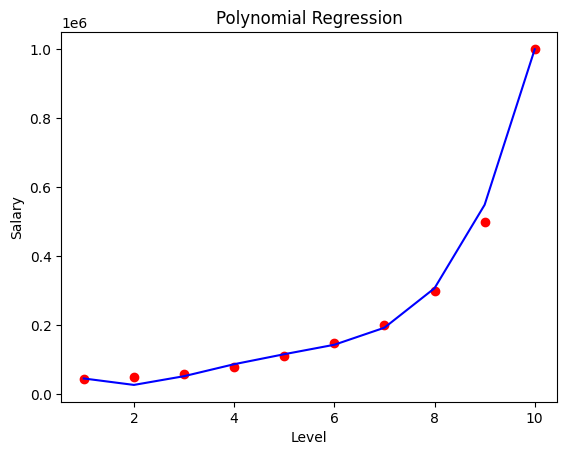

In [25]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_poly.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()


* Hasil prediksi divisualisasikan dengan scatter plot (titik merah) dan garis prediksi polinomial (garis biru).